In [ ]:
import pandas as pd
import json
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Enable progress bars for Pandas
tqdm.pandas()

In [ ]:
# Function to load dataset
def load_dataset(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return pd.DataFrame(data)

In [ ]:
# Load train, dev, and test datasets
train_df = load_dataset("train.json")
dev_df = load_dataset("dev.json")
test_df = load_dataset("test.json")

In [ ]:
# Function to convert tokens into a sentence
def convert_to_sentence(row):
    return ' '.join(row['token'])

In [ ]:
# Apply conversion to all datasets
train_df['sentence'] = train_df.apply(convert_to_sentence, axis=1)
dev_df['sentence'] = dev_df.apply(convert_to_sentence, axis=1)
test_df['sentence'] = test_df.apply(convert_to_sentence, axis=1)

In [ ]:
# text preprocessing function
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s\d]', '', text)  # Remove punctuation but keep numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

In [ ]:
# Apply preprocessing to datasets with progress bar
train_df['processed_text'] = train_df['sentence'].progress_apply(preprocess)
dev_df['processed_text'] = dev_df['sentence'].progress_apply(preprocess)
test_df['processed_text'] = test_df['sentence'].progress_apply(preprocess)

100%|██████████| 13418/13418 [00:00<00:00, 25237.48it/s]


In [ ]:
# Extract labels
train_labels = train_df['relation']
dev_labels = dev_df['relation']
test_labels = test_df['relation']

In [ ]:
# Print dataset sizes
print("Train Set Size:", train_df.shape)
print("Dev Set Size:", dev_df.shape)
print("Test Set Size:", test_df.shape)

Train Set Size: (58465, 16)
Dev Set Size: (19584, 16)
Test Set Size: (13418, 16)


In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train = vectorizer.fit_transform(train_df['processed_text'])
X_dev = vectorizer.transform(dev_df['processed_text'])
X_test = vectorizer.transform(test_df['processed_text'])

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_dev = label_encoder.transform(dev_labels)
y_test = label_encoder.transform(test_labels)

In [ ]:
# Train SVM Model
svm_model = SVC(kernel='linear', C=1.0, verbose=False)  # Reduced verbosity
print("\nTraining SVM Model...")
svm_model.fit(X_train, y_train)


Training SVM Model...


SVC(kernel='linear')

In [ ]:
# Validation Results
print("\nValidation Results:")
y_dev_pred = svm_model.predict(X_dev)


Validation Results:


In [ ]:
# Classification report
target_labels = label_encoder.inverse_transform(np.unique(y_dev))
print(classification_report(y_dev, y_dev_pred, labels=np.unique(y_dev), target_names=target_labels))


                                     precision    recall  f1-score   support

                        no_relation       0.59      0.96      0.73     11246
                org:alternate_names       0.00      0.00      0.00       440
                 org:city_of_branch       0.00      0.00      0.00       191
              org:country_of_branch       0.00      0.00      0.00       338
                      org:dissolved       0.00      0.00      0.00         7
                        org:founded       1.00      0.03      0.05        36
                     org:founded_by       0.00      0.00      0.00        76
                      org:member_of       0.00      0.00      0.00        88
                        org:members       0.00      0.00      0.00       194
    org:number_of_employees/members       0.00      0.00      0.00        27
org:political/religious_affiliation       0.00      0.00      0.00        34
                   org:shareholders       0.00      0.00      0.00        8

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Test Results
print("\nTest Results:")
y_test_pred = svm_model.predict(X_test)


Test Results:


In [ ]:
# Classification report
target_labels = label_encoder.inverse_transform(np.unique(y_test))
print(classification_report(y_test, y_test_pred, labels=np.unique(y_test), target_names=target_labels))


                                     precision    recall  f1-score   support

                        no_relation       0.59      0.96      0.73      7770
                org:alternate_names       0.00      0.00      0.00       337
                 org:city_of_branch       0.00      0.00      0.00       129
              org:country_of_branch       0.00      0.00      0.00       166
                      org:dissolved       0.00      0.00      0.00         5
                        org:founded       1.00      0.03      0.06        34
                     org:founded_by       0.00      0.00      0.00        84
                      org:member_of       0.00      0.00      0.00        64
                        org:members       0.00      0.00      0.00        63
    org:number_of_employees/members       0.00      0.00      0.00        13
org:political/religious_affiliation       0.00      0.00      0.00        29
                   org:shareholders       0.00      0.00      0.00        1

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


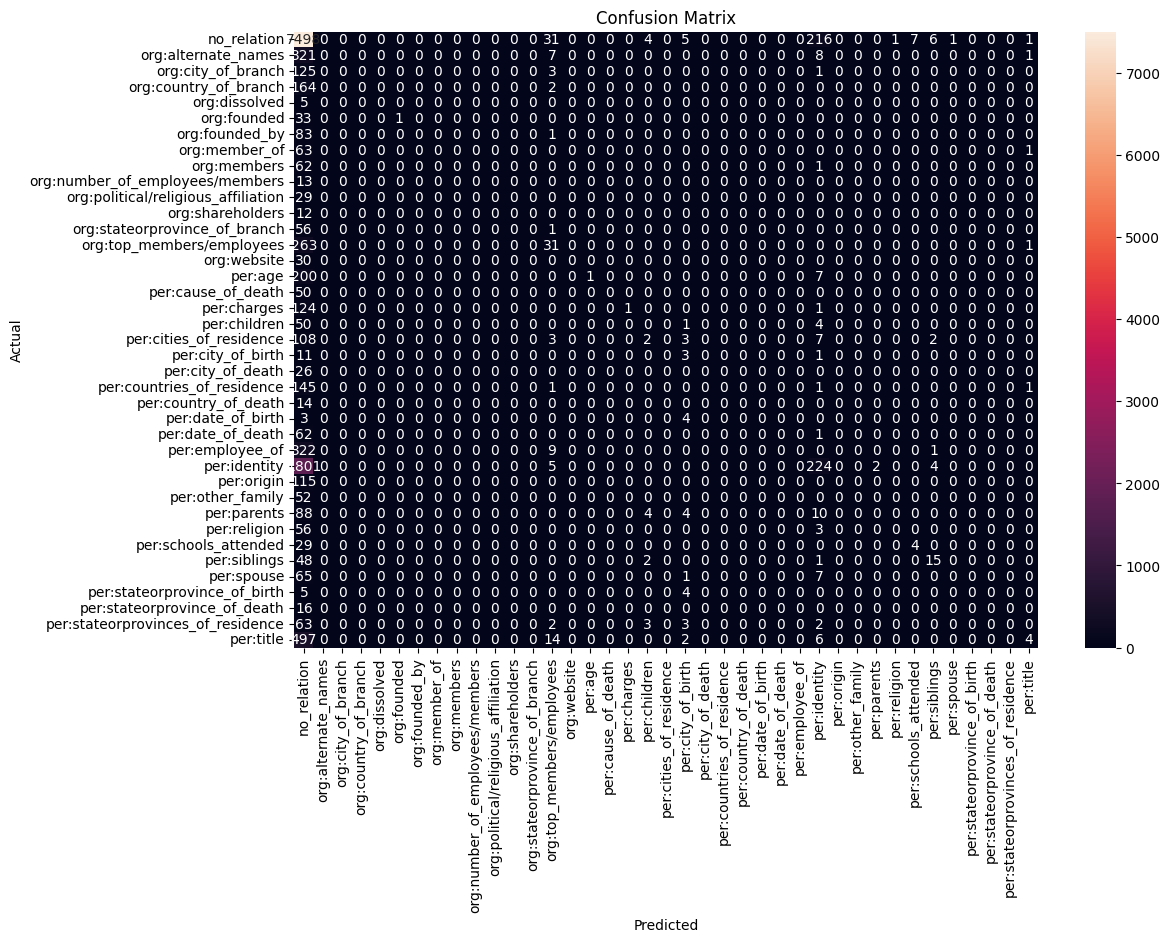

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=target_labels, yticklabels=target_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Function for prediction
def predict_relation(sentence):
    if not sentence.strip():  # Handle empty input
        return "Invalid input: Empty sentence"

    processed_text = preprocess(sentence)  # Preprocess input
    sentence_features = vectorizer.transform([processed_text])  # Vectorize input
    prediction = svm_model.predict(sentence_features)  # Predict label
    predicted_relation = label_encoder.inverse_transform(prediction)[0]  # Convert back to label

    return predicted_relation


In [ ]:
# Example Prediction
example_sentence = "Gaurav was born in California"
print("\nExample Prediction:")
print(f"Sentence: {example_sentence}")
print(f"Predicted Relation: {predict_relation(example_sentence)}")


Example Prediction:
Sentence: Gaurav was born in California
Predicted Relation: per:city_of_birth


In [ ]:
# Example Prediction
example_sentence = "Ismael loves his parents"
print("\nExample Prediction:")
print(f"Sentence: {example_sentence}")
print(f"Predicted Relation: {predict_relation(example_sentence)}")


Example Prediction:
Sentence: Ismael loves his parents
Predicted Relation: per:identity


In [ ]:
# Example Prediction
example_sentence = "Gaurav has one brother"
print("\nExample Prediction:")
print(f"Sentence: {example_sentence}")
print(f"Predicted Relation: {predict_relation(example_sentence)}")


Example Prediction:
Sentence: Gaurav has one brother
Predicted Relation: per:siblings


In [ ]:
# Example Prediction
example_sentence = "Gaurav is the founder of Apple"
print("\nExample Prediction:")
print(f"Sentence: {example_sentence}")
print(f"Predicted Relation: {predict_relation(example_sentence)}")


Example Prediction:
Sentence: Gaurav is the founder of Apple
Predicted Relation: org:founded_by


In [ ]:
import joblib

# Save the model to a file
joblib.dump(svm_model, 'svm_model2.joblib')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer2.joblib')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder2.joblib')

print("Model, vectorizer, and label encoder saved successfully.")

Model, vectorizer, and label encoder saved successfully.
